In [284]:
import pandas as pd
import seaborn as sns
import numpy as np
import glob

In [285]:
regr_glob = glob.glob('./results/*regression*')
regr_glob_names = [val.split('/')[-1] for val in regr_glob]

In [286]:
clasif_glob = glob.glob('./results/*classification*')
clasif_glob_names = [val.split('/')[-1] for val in clasif_glob]

In [287]:
all_glob = regr_glob + clasif_glob
all_glob_names = regr_glob_names + clasif_glob_names

In [288]:
lst_dfs = [pd.read_csv(f) for f in regr_glob]

In [289]:
regr = [df.assign(new='regression').rename(columns={'new': 'task_type'}) for df in lst_dfs]

In [290]:
lst_dfs = [pd.read_csv(f) for f in clasif_glob]

In [291]:
clasif = [df.assign(new='classification').rename(columns={'new': 'task_type'}) for df in lst_dfs]

In [292]:
data = regr + clasif

In [303]:
case1 = pd.concat([data[2], data[-1]])

case2 = pd.concat([data[1], data[-2]])

case3 = pd.concat([data[0], data[-3]])

case1.shape, case2.shape, case3.shape

((5400, 6), (7200, 6), (7200, 6))

Text(0, 0.5, 'best percent gain/loss with feature reduction from base model')

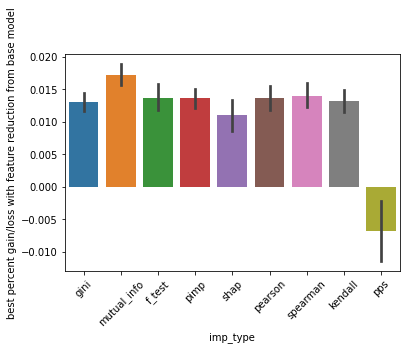

In [304]:
# Case1: Can we get a metric improvement
plot1 = sns.barplot(x='imp_type', y='max_perc', ci=95,
            data=case1, 
#             order=case_1.imp_type.unique().tolist()
            )
plot1.set_xticklabels(plot.get_xticklabels(), rotation=45);
plot1.set_ylabel('best percent gain/loss with feature reduction from base model')

Text(0, 0.5, 'percent of features dropped without accuracy loss')

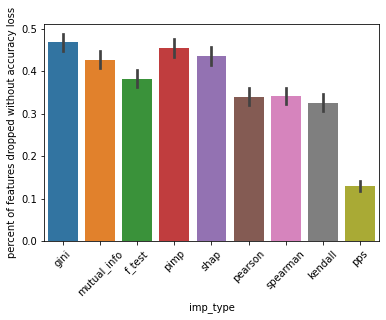

In [306]:
# Case2: No decrease in metric
# % features dropped without performance decrease
plot2 = sns.barplot(x='imp_type', y='max_dropped',
            data=case2,
#             order=case_1.imp_type.unique().tolist()
            )
plot2.set_xticklabels(plot.get_xticklabels(), rotation=45);
plot2.set_ylabel('percent of features dropped without accuracy loss')

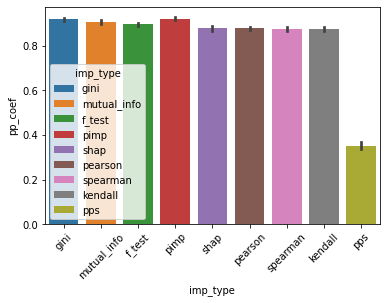

In [307]:
# Case 3: Maximum interpretability 80% of all features, rounded)
plot3 = sns.barplot(x='imp_type', y='pp_coef', hue='imp_type', ci=95, dodge=False,
            data=case3,
#             order=sub2.imp_type.unique().tolist()
            )
plot3.set_xticklabels(plot.get_xticklabels(), rotation=45);

In [ ]:
sign = '±'

In [487]:
def return_data_table(plot, imp_type_arr):
    interval_high = [h.get_ydata()[1] for h in plot.get_lines()]
    interval_high = [x for x in interval_high if x > 0 or x < 0]
    interval_high = np.array(interval_high) * 100
    
    interval_low = [h.get_ydata()[0] for h in plot.get_lines()]
    interval_low = [x for x in interval_low if x > 0 or x < 0]
    interval_low = np.array(interval_low) * 100
    
    interval_mean = (interval_low + interval_high) / 2
    abs_diff =  abs(interval_mean - interval_low)
    
    df = pd.DataFrame({'imp_type': imp_type_arr, 'mean': interval_mean, 'abs_diff': abs_diff})
#     pretty_repr = []
    pretty_repr = df.round(2)
    pretty_repr['pretty'] = (pretty_repr['mean'].astype(str) +
                             ' ± '
                               + pretty_repr['abs_diff'].astype(str))
    return pretty_repr['pretty']

In [488]:
plots = [plot1, plot2, plot3]

In [505]:
imp_arr = case_1.imp_type.unique()
results = [return_data_table(x, imp_arr) for x in plots]
results;

In [506]:
# Case1: Can we get a metric improvement
# Case2: No decrease in metric
# Case 3: Maximum interpretability 80% of all features, rounded)

In [509]:
result_arr = pd.DataFrame({'method': imp_arr,
                           'improvement': results[0], 
                           'useless_feat': results[1], 
                           'minimal_model': results[2]})

In [510]:
result_arr

,method,improvement,useless_feat,minimal_model
0,gini,1.31 ± 0.14,46.74 ± 1.92,91.72 ± 0.67
1,mutual_info,1.73 ± 0.16,42.69 ± 2.06,90.6 ± 0.73
2,f_test,1.38 ± 0.2,38.17 ± 2.0,89.59 ± 0.74
3,pimp,1.36 ± 0.15,45.44 ± 2.16,92.01 ± 0.66
4,shap,1.09 ± 0.24,43.46 ± 2.13,87.69 ± 1.01
5,pearson,1.36 ± 0.19,34.05 ± 1.92,87.71 ± 0.81
6,spearman,1.41 ± 0.18,34.17 ± 1.86,87.46 ± 0.73
7,kendall,1.32 ± 0.17,32.58 ± 1.97,87.52 ± 0.76
8,pps,-0.68 ± 0.47,13.11 ± 1.17,35.19 ± 1.52
